In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MSM

In [17]:
def plot(path, title):
    df = pd.read_csv(path)
    _train = df['train_loss'].values
    _test = df['test_loss'].values

    num = 50
    train = np.convolve(_train, np.ones(num)/num)[:len(_train)]
    train[:num] = [np.mean(_train[:n+1]) for n in range(num)]
    test = np.convolve(_test, np.ones(num)/num)[:len(_test)]
    test[:num] = [np.mean(_test[:n+1]) for n in range(num)]
    
    plt.plot(_train, 'lightblue')
    plt.plot(_test, 'pink')
    plt.plot(train, 'blue', label='train')
    plt.plot(test, 'red', label='test')
    plt.legend(loc='upper right')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.ylim([0, 0.1])
    #plt.ylim([0, 0.1])
    plt.grid()
    plt.show()

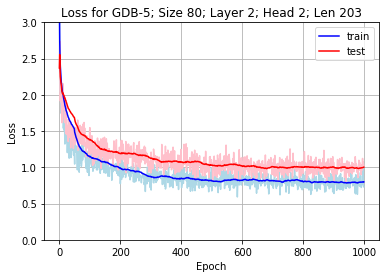

In [9]:
plot('../result/log/MSM_GDB05.csv', 'Loss for GDB-5; Size 80; Layer 2; Head 2; Len 203')

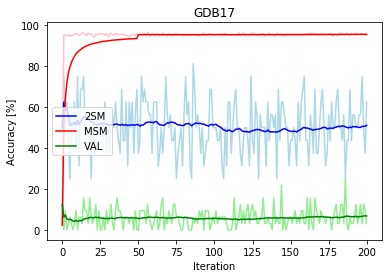

In [28]:
df = pd.read_csv('../result/log/GDB17.csv')
_acc_2sm = df['acc_2sm'].values
_acc_msm = df['acc_msm'].values
_acc_val = df['acc_val'].values

num = 50
acc_2sm = np.convolve(_acc_2sm, np.ones(num)/num)[:len(_acc_2sm)]
acc_2sm[:num] = [np.mean(_acc_2sm[:n+1]) for n in range(num)]
acc_msm = np.convolve(_acc_msm, np.ones(num)/num)[:len(_acc_msm)]
acc_msm[:num] = [np.mean(_acc_msm[:n+1]) for n in range(num)]
acc_val = np.convolve(_acc_val, np.ones(num)/num)[:len(_acc_val)]
acc_val[:num] = [np.mean(_acc_val[:n+1]) for n in range(num)]

plt.plot(_acc_2sm, 'lightblue')
plt.plot(_acc_msm, 'pink')
plt.plot(_acc_val, 'lightgreen')
plt.plot(acc_2sm, 'blue', label='2SM')
plt.plot(acc_msm, 'red', label='MSM')
plt.plot(acc_val, 'green', label='VAL')
plt.legend(loc='center left')
plt.xlabel('Iteration')
plt.ylabel('Accuracy [%]')
plt.title('GDB17')
plt.show()

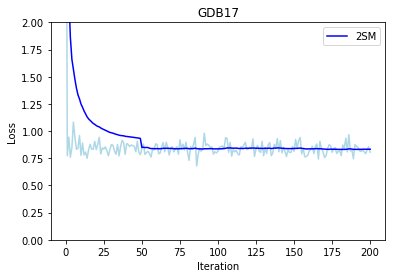

In [29]:
_loss = df['loss_tot'].values

num = 50
loss = np.convolve(_loss, np.ones(num)/num)[:len(_loss)]
loss[:num] = [np.mean(_loss[:n+1]) for n in range(num)]

plt.plot(_loss, 'lightblue')
plt.plot(loss, 'blue', label='2SM')
plt.legend(loc='upper right')
plt.xlabel('Iteration')
plt.ylim([0,2])
plt.ylabel('Loss')
plt.title('GDB17')
plt.show()